# Maven Halloween Challenge

### Challenge Objective

For the Maven Halloween Challenge, we need to take a data-driven approach for becoming the most popular trick-or-treating house on the block.

Using online votes ranking 85 types of candy, our task is to find the 3 treats you'll give out on Halloween to guarantee that trick-or-treaters of all tastes find something they'll love and present the data to back up your decision.

Link to the challenge: https://mavenanalytics.io/challenges/maven-halloween-challenge/701f06a2-a19b-41e9-95d3-37a0dcc5492f

### About the Dataset

Data compiled from an experiment that set out to find the most popular Halloween candy by asking online voters to select their favorite from randomly generated matchups (for example, Twix or Snickers?), using 269k votes from random 1v1 matchups.

### Summary of Results and Methodology

#### And the Winning Trio is... Reese's Peanut Butter Cups, Twix and Starburst

After some basic exploration - looking at distributions, correlations and how the ingredients are combined into different types of treats, I decided to use K-means clustering to identify 3 treat categories that could align with 3 trick-or-treater profiles.<br> <br> Then, from each treat cluster I chose the top treat in terms of win %. The 3 winners became our winning treat trio!

### Importing libararies and data

In [238]:
### Importing libraries, setting display options and importing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
# show all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [240]:
# import candy data!
candy = pd.read_csv(r'C:\Users\Irina\Documents\GitHub Portofolio\Maven Halloween Candy Challenge\candy-data.csv')
dictionary = pd.read_csv(r'C:\Users\Irina\Documents\GitHub Portofolio\Maven Halloween Candy Challenge\candy_data_dictionary.csv')

### Data cleaning and basic exploration

Let's preview the data and the data dictionary to see what we're working with:

In [241]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [242]:
dictionary

,Field,Description
0,competitorname,The name of the candy
1,chocolate,Does it contain chocolate?
2,fruity,Is it fruit flavored?
3,caramel,Is there caramel in the candy?
4,peanutalmondy,"Does it contain peanuts, peanut butter or almo..."
5,nougat,Does it contain nougat?
6,crispedricewafer,"Does it contain crisped rice, wafers, or a coo..."
7,hard,Is it a hard candy?
8,bar,Is it a candy bar?
9,pluribus,Is it one of many candies in a bag or box?


At a first glance data looks good - all numeric data (integer and float), no missing values, no duplicates.

The basic stats for each columns:

In [243]:
# basic stats for each column
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


Looking at nulls and data types:

In [244]:
# nulls and data types
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


Even though the dataset is very small, let's do a quick check for duplicates by competitorname:

In [245]:
# checking for duplicates
candy['competitorname'].duplicated().any()

False

As we will try a clustering algorithm later,  we'll create a new column now for the win%, to bring it on the same scale as the price and sugar percentile.

In [246]:
# bring the win percentage on the same scale as sugar and price
candy['win'] = candy['winpercent']/100

### Let's visualize the data!

Now let's see some distributions for different characteristics of each candy.

In [247]:
# extract the column names
candy.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent', 'win'],
      dtype='object')

In [248]:
# separate list of ingredients
ingredient_list = ['chocolate','fruity','caramel','peanutyalmondy', 'nougat', 'crispedricewafer']

In [249]:
# included all the percentages on the same scale
pct_list = ['sugarpercent','pricepercent','win']

In [250]:
# candy by shape
candy_shape = ['hard','bar','pluribus']

While the price and sugar are included in the data as percentiles (which would be represented on a curve), the win% is more interesting. I want to see how the win percentages are distributed, so we'll create a histogram. The result looks close to a normal distribution.

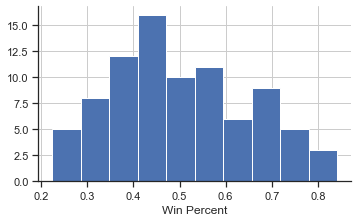

In [251]:
sns.set(rc={"figure.figsize":(5,3)}, style="ticks")
candy['win'].hist()
sns.despine()
plt.xlabel("Win Percent")
plt.show()

And to start in a simple way, let's see which ingredients are the most common:

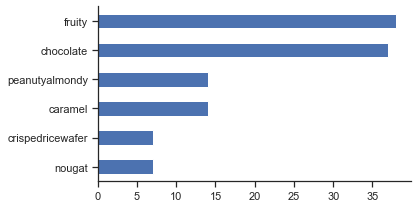

In [252]:
candy[ingredient_list].sum().sort_values(ascending=True).plot.barh()
sns.despine()

Which are the most popular candy shapes / packaging styles?

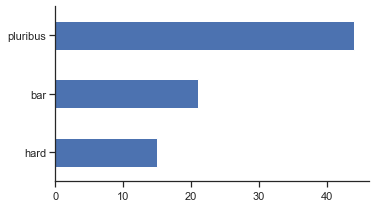

In [253]:
candy[candy_shape].sum().sort_values(ascending=True).plot.barh()
sns.despine()

### Now for the fun part -  let's see how different ingredients combine in different treats. The UpSet Plot.

I recently stumbled upon a very interesting type of plot - the UpSet plot (see more here: https://en.wikipedia.org/wiki/UpSet_plot)

The UpSet plot is a data visualization method for showing set data with more than three intersecting sets. Here we have several ingredients intersecting and forming different treats, so I thought it would be a useful tool to help us understand the data at a glance.

Python has a special library that helps us create this type of plot, so next we will prepare the data and generate this plot.

In [254]:
# if we don't have this library installed, here's the code to do it:
# pip install upsetplot

In [255]:
from upsetplot import UpSet

In [256]:
candy.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent', 'win'],
      dtype='object')

We need to prepare data in a different shape to be able to generate this type of chart. <br>First we'll isolate the columns we need and convert the 0 and 1 to True/False.<br> I will generate 2 versions of the plot - one with ingredients only (simpler and easier to follow) and another with ingredients and shapes.

In [257]:
candy_upset = candy[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer']].replace({0:False, 1:True})

In [258]:
candy_upset_all = candy[['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']].replace({0:False, 1:True})

In [259]:
candy_upset.head(3)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer
0,True,False,True,False,False,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False


Another necessary step for this type of plot - set the index:

In [260]:
candy_upset = candy_upset.set_index(list(candy_upset[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 
                                                      'nougat','crispedricewafer']].columns))

In [261]:
candy_upset_all = candy_upset_all.set_index(list(candy_upset_all[['chocolate', 'fruity', 'caramel', 
                                                                  'peanutyalmondy','nougat','crispedricewafer', 
                                                                  'hard', 'bar', 'pluribus']].columns))

In [262]:
candy_upset.head(3)

Empty DataFrame
Columns: []
Index: [(True, False, True, False, False, True), (True, False, False, False, True, False), (False, False, False, False, False, False)]

<b>And show the plot!</b>

On the right we have a bar chart of all the ingredients and their overall counts.
<br>On the top we have the size of each intersection (Ex: how many treats have a combination of chocolate and peanuts?)
<br>The matrix shows the intersection of all ingredients

The ingredient only plot:

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

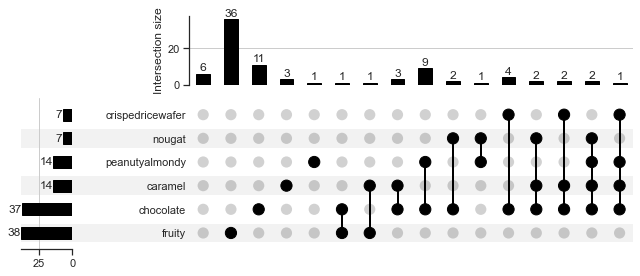

In [263]:
sns.set(rc={"figure.figsize":(20, 40)},style='ticks')
upset = UpSet(candy_upset,subset_size="count", intersection_plot_elements=3,show_counts=True)
upset.plot()

And the plot that includes all candy attributes - ingredients and shapes. 

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

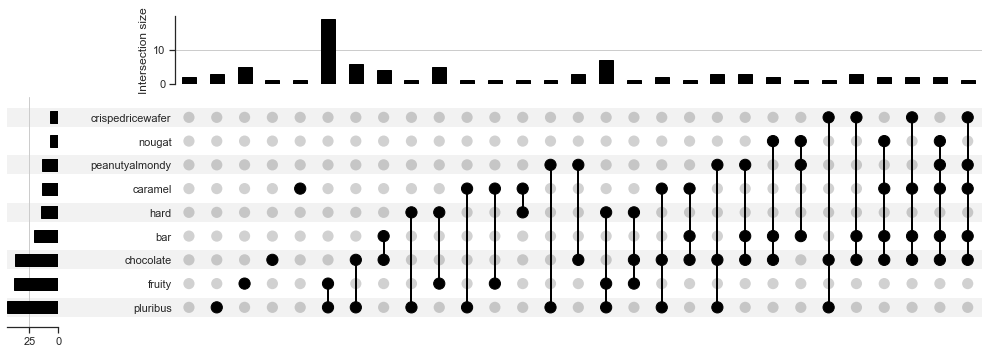

In [264]:
sns.set(rc={"figure.figsize":(20, 40)},style='ticks')
upset = UpSet(candy_upset_all,subset_size="count", intersection_plot_elements=3)
upset.plot()

I personally prefer the first version of the plot, which is simpler and gives me a good idea of how the ingredients are distributed.

### Let's see some correlations between ingredients and winpercent

We'll check strength of the relationship between the variables in our data

First, let's look at how all the variables we have correlate with the win percent. It seems that the top 3 elements that are positively correlated with winning are "chocolate", "bar" and "peanutalmondy"

In [265]:
corr_variables = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'win']

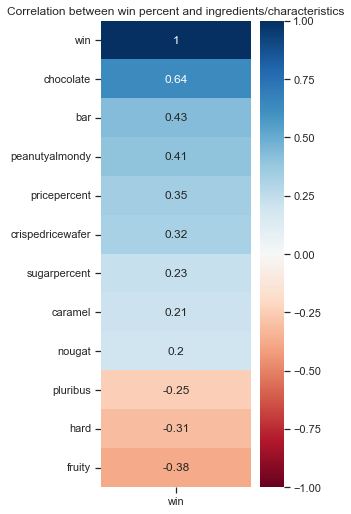

In [266]:
sns.set(rc={"figure.figsize":(3, 8)}, style="ticks")
heatmap = sns.heatmap(candy[corr_variables].corr()[['win']].sort_values(by='win',ascending=False),vmin=-1,vmax=1,annot=True,cmap="RdBu")
heatmap.set_title('Correlation between win percent and ingredients/characteristics')
plt.show()

However, if we look at the correlations between all the elements, we see that there's a relatively high correlation between chocolate and bar. <br> This makes sense, considering that ususally chocolate comes in bar form.`

<AxesSubplot:>

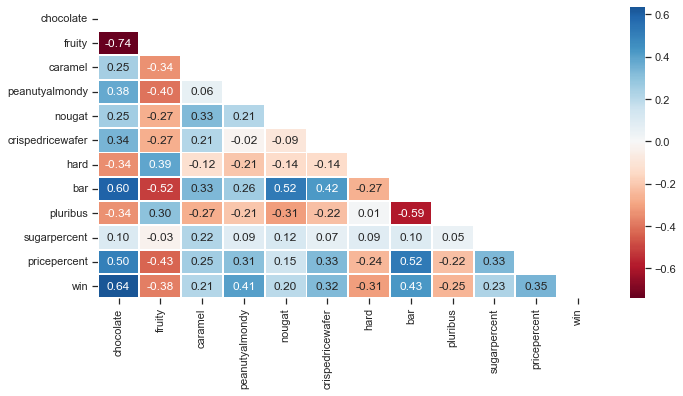

In [267]:
sns.set(rc={"figure.figsize":(10, 5)}, style="ticks")
corr_matrix = candy[corr_variables].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
sns.heatmap(candy[corr_variables].corr(),annot=True,cmap="RdBu",center=0, linewidths=1, fmt=".2f",mask=mask)

Let's dive deeper into the relationships between win - sugar and win - price and see if they are statistically significant.m

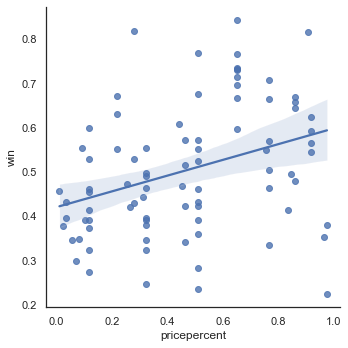

In [268]:
sns.set(rc={"figure.figsize":(7, 7)}, style="white")
sns.lmplot(data=candy, x='pricepercent', y='win')

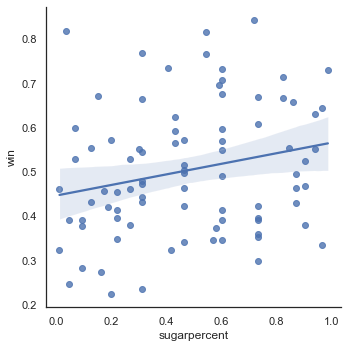

In [269]:
sns.set(rc={"figure.figsize":(7, 7)}, style="white")
sns.lmplot(data=candy, x='sugarpercent', y='win')

Both correlations are low/moderate and statistically significant (the p-values calculated below are < 0.05 in both cases).

In [270]:
# import the library that helps us calculate the p value
from scipy.stats import pearsonr

In [271]:
pearsonr(candy['win'], candy['sugarpercent'])

(0.22915065712800653, 0.03489789676169812)

In [272]:
pearsonr(candy['win'], candy['pricepercent'])

(0.34532540996768485, 0.0012088290261781025)

### Group the candy using K-Means Clustering

I tried different combinations of elements for clustering before settling on the one below. Interestingly, although the composition of the clusters differed each time, the winners were always the same.

In the end, I decided to focus on ingredients only for clustering, leaving out the shape/packaging of the candy, price and sugar contents. I found that this approach give a clearer separation which made sense to me, considering my candy domain knowledge :)

In [273]:
# set the competitor name as index
candy = candy.set_index('competitorname')

Select the attributes based on which we will group the candy:

In [274]:
cluster_list = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 
                #'hard', 'bar', 
                #'sugarpercent'#,
                #'pricepercent'
               ]

Although I know I'm looking for 3 clusters, we'll try to use the elbow method to identify the most appropriate number of clusters and see if we're close.
<br>To perform the elbow method, we'll run several k-means, increment k with each iteration, and record the SSE. We're looking for the spot where the SSE curve starts to bend like an elbow point - there we will have our number of clusters.

In [275]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.metrics import silhouette_score

In [276]:
candy_cluster = candy[cluster_list]

In [277]:
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
    # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(candy_cluster.values)
    sse.append(kmeans.inertia_)

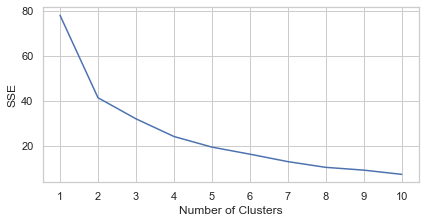

In [278]:
sns.set(rc={"figure.figsize":(6, 3)}, style="whitegrid")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Interestingly, the result shows that we would ideally have around 4 clusters. However, for our purposes we'll stick with 3 for now.

In [279]:
# Tried different standardizing methods, but decided against that, since we already have values between 0 and 1
df = candy_cluster
# scale the data with StandardScaler
#df = StandardScaler().fit_transform(df)
#df=RobustScaler().fit_transform(df)
#df = PowerTransformer().fit_transform(df)
kmeans = KMeans(n_clusters=3,random_state=0).fit(df)

In [280]:
centers = kmeans.cluster_centers_
print(centers)
print(kmeans.labels_)

[[ 2.63157895e-02  1.00000000e+00  2.63157895e-02 -5.55111512e-17
  -2.77555756e-17 -2.77555756e-17]
 [ 7.27272727e-01 -1.11022302e-16  3.03030303e-01 -2.77555756e-17
   1.21212121e-01  1.81818182e-01]
 [ 8.57142857e-01 -5.55111512e-17  2.14285714e-01  1.00000000e+00
   2.14285714e-01  7.14285714e-02]]
[1 1 1 1 0 2 2 2 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 2 1 0 1 1
 1 1 1 2 0 2 1 0 0 2 2 1 0 0 2 2 2 2 0 1 1 0 1 0 0 1 0 2 2 0 0 0 0 1 1 0 0
 0 1 1 1 0 1 0 0 0 1 1]


In [281]:
# how many types of candy do we have per group?
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 33, 0: 38, 2: 14})

In [282]:
candy_cluster.columns.to_list()

['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer']

In [283]:
syms =['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 ]

A visual of the clusters:

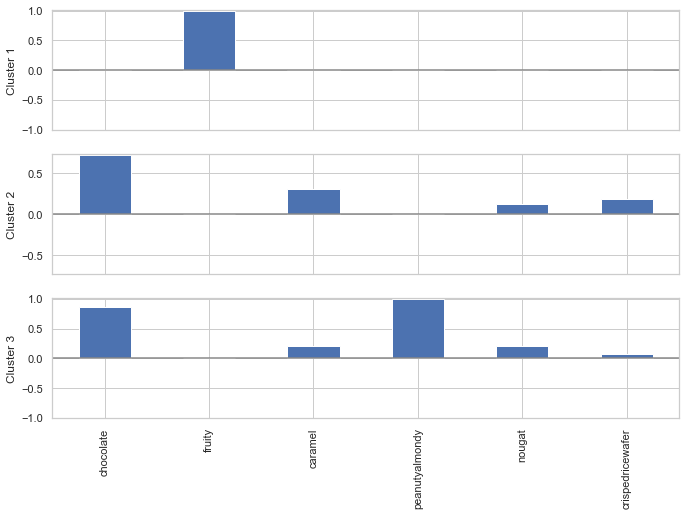

In [284]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns = syms)

f,axes = plt.subplots(3,1,figsize=(10,7),sharex=True)
for i,ax in enumerate(axes):
    center = centers.loc[i,:]
    maxPC = 1.01*np.max(np.max(np.abs(center)))
    colors = ['C0' if l>0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax,color=colors)
    ax.set_ylabel(f'Cluster {i+1}')
    ax.set_ylim(-maxPC,maxPC)

In [285]:
# add the cluster data to the candy data 
candy.loc[:,"cluster"] = kmeans.labels_

In [286]:
# how many taste candies do we have per group?
candy.groupby(['cluster']).size()

cluster
0    38
1    33
2    14
dtype: int64

### The Winning Candy Trio + Analysis by Cluster

Now that we have the clusters, let's see which our the top favourites by cluster

In [287]:
candy.groupby(['cluster'])['winpercent'].max()

cluster
0    67.037628
1    81.642914
2    84.180290
Name: winpercent, dtype: float64

In [288]:
candy.groupby(['cluster'])['winpercent'].nlargest(3)

cluster  competitorname           
0        Starburst                    67.037628
         Skittles original            63.085140
         Sour Patch Kids              59.863998
1        Twix                         81.642914
         Kit Kat                      76.768600
         Milky Way                    73.099556
2        Reese's Peanut Butter cup    84.180290
         Reese's Miniatures           81.866257
         Snickers                     76.673782
Name: winpercent, dtype: float64

In [289]:
# find the indices of the rows with the highest win percent per each group
idx = candy.groupby(['cluster'])['winpercent'].transform(max) == candy['winpercent']

And our winners are:

In [290]:
# our final choices
candy[idx]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,win,cluster
competitorname,,,,,,,,,,,,,,
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,0.841803,2
Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,0.670376,0
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,0.816429,1


In [291]:
# let's see the top 3 in each cluster
candy[candy.groupby('cluster')['winpercent'].apply(lambda x: x.isin(x.nlargest(3)))]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,win,cluster
competitorname,,,,,,,,,,,,,,
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600,0.767686,1
Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556,0.730996,1
Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,0.818663,2
Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290,0.841803,2
Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,0.630851,0
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782,0.766738,2
Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,0.598640,0
Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,0.670376,0
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914,0.816429,1


In [292]:
#export data to csv for PowerBI
# candy.to_csv(r'C:\Users\Irina\Documents\GitHub Portofolio\Maven Halloween Candy Challenge\candy_cluster.csv')

Let's see how the ingredients are distributed by cluster:

In [293]:
candy[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus','cluster']].groupby(['cluster']).sum().transpose().style.background_gradient(axis=0)  

cluster,0,1,2
chocolate,1,24,12
fruity,38,0,0
caramel,1,10,3
peanutyalmondy,0,0,14
nougat,0,4,3
crispedricewafer,0,6,1
hard,13,2,0
bar,0,14,7
pluribus,26,14,4


And the average sugar and price percent by cluster:

In [294]:
candy[['sugarpercent',
       'pricepercent','win','cluster']].groupby(['cluster']).mean().transpose().style.background_gradient(axis=0)  

cluster,0,1,2
sugarpercent,0.467895,0.467424,0.534286
pricepercent,0.332737,0.541758,0.666643
win,0.441197,0.517762,0.636971


And the correlations between win - sugar and win - price - this time by cluster!

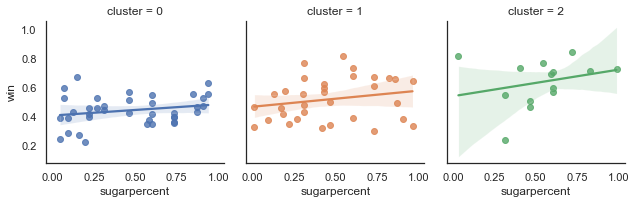

In [295]:
sns.set(style="white")
sns.lmplot(
    data=candy, x="sugarpercent", y="win",
    col="cluster",hue='cluster', height=3,
)

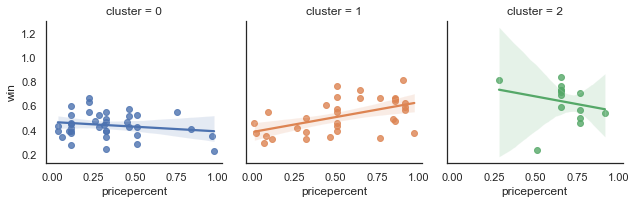

In [296]:
sns.lmplot(
    data=candy, x="pricepercent", y="win",
    col="cluster",hue='cluster', height=3,
)

An the analysis continues! In PowerBI :)
Check the PowerBI report for a quick presentation of the results and for an interactive shopping list for the busy shopper.